In [781]:

import kagglehub

# Download latest version
path = kagglehub.dataset_download("deepcontractor/miami-housing-dataset")

print("Path to dataset files:", path)

import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


df = pd.read_csv(path + "\miami-housing.csv")

# Display the first few rows to confirm it loaded correctly
print(df.head())



<>:15: SyntaxWarning: invalid escape sequence '\m'
<>:15: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Mario\AppData\Local\Temp\ipykernel_6944\2584528631.py:15: SyntaxWarning: invalid escape sequence '\m'
  df = pd.read_csv(path + "\miami-housing.csv")


Path to dataset files: C:\Users\Mario\.cache\kagglehub\datasets\deepcontractor\miami-housing-dataset\versions\3
    LATITUDE  LONGITUDE      PARCELNO  SALE_PRC  LND_SQFOOT  TOT_LVG_AREA  \
0  25.891031 -80.160561  622280070620  440000.0        9375          1753   
1  25.891324 -80.153968  622280100460  349000.0        9375          1715   
2  25.891334 -80.153740  622280100470  800000.0        9375          2276   
3  25.891765 -80.152657  622280100530  988000.0       12450          2058   
4  25.891825 -80.154639  622280100200  755000.0       12800          1684   

   SPEC_FEAT_VAL  RAIL_DIST  OCEAN_DIST  WATER_DIST  CNTR_DIST  SUBCNTR_DI  \
0              0     2815.9     12811.4       347.6    42815.3     37742.2   
1              0     4359.1     10648.4       337.8    43504.9     37340.5   
2          49206     4412.9     10574.1       297.1    43530.4     37328.7   
3          10033     4585.0     10156.5         0.0    43797.5     37423.2   
4          16681     4063.4     108

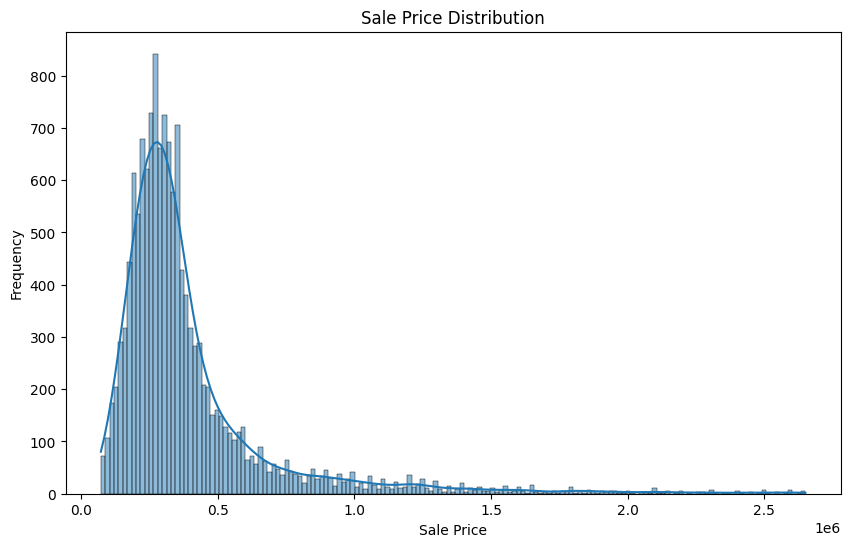

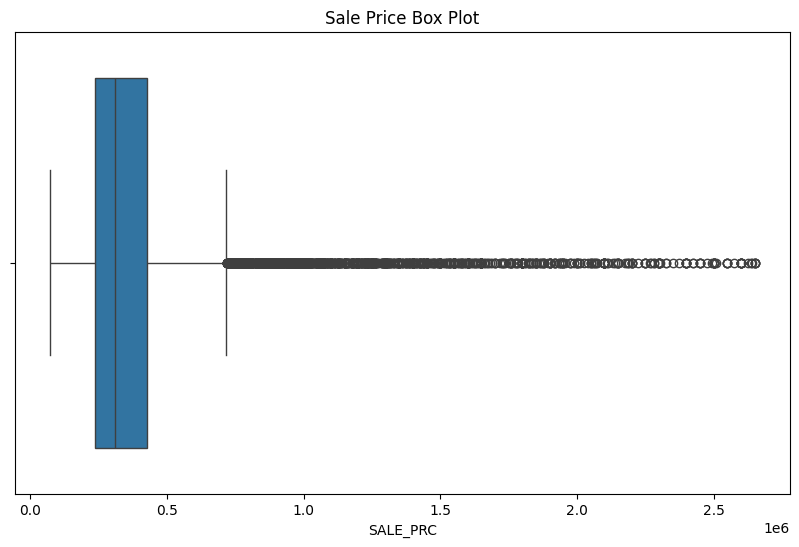

Skewness of Sale Price: 3.2155058107172554


In [782]:
import seaborn as sns

# Assuming df is your DataFrame and 'SALE_PRC' is the column you're checking for skewness

# 1. Visualize the data with a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['SALE_PRC'], kde=True)  # kde adds a Kernel Density Estimate line
plt.title('Sale Price Distribution')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()

# 2. Box plot to check for skewness and outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['SALE_PRC'])
plt.title('Sale Price Box Plot')
plt.show()

# 3. Calculate skewness
skewness = df['SALE_PRC'].skew()
print(f"Skewness of Sale Price: {skewness}")


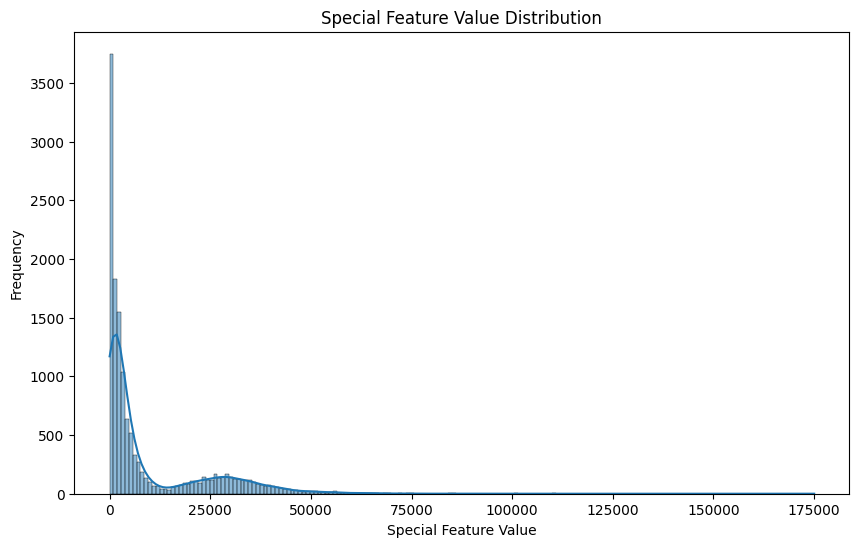

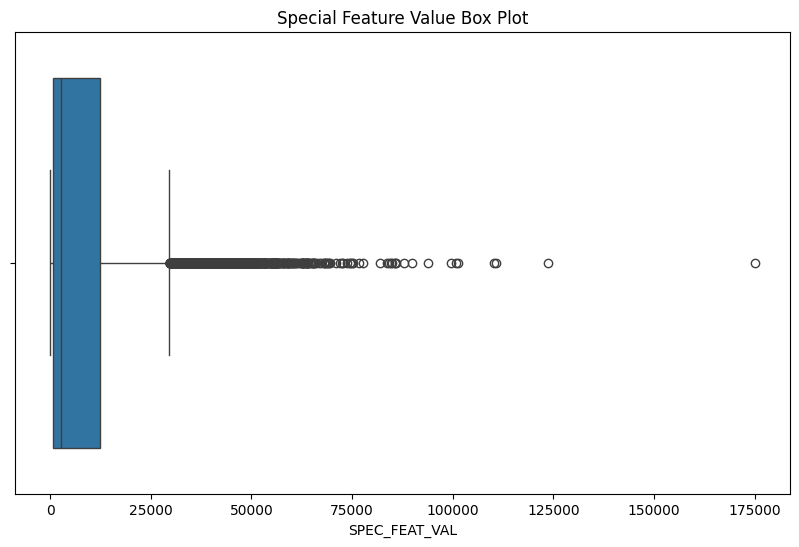

Skewness of Special Feature Value: 1.9022502230324045


In [783]:
# 1. Visualize the data with a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['SPEC_FEAT_VAL'], kde=True)  # kde adds a Kernel Density Estimate line
plt.title('Special Feature Value Distribution')
plt.xlabel('Special Feature Value')
plt.ylabel('Frequency')
plt.show()

# 2. Box plot to check for skewness and outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['SPEC_FEAT_VAL'])
plt.title('Special Feature Value Box Plot')
plt.show()

# 3. Calculate skewness
skewness_spec_feat_val = df['SPEC_FEAT_VAL'].skew()
print(f"Skewness of Special Feature Value: {skewness_spec_feat_val}")


In [784]:
row_count = df.shape[0]
print(f"Total rows: {row_count}")

# Check for missing values in the entire DataFrame
missing_values = df.isnull().sum()

# Display columns with missing values and their counts
print(missing_values[missing_values > 0])


Total rows: 13932
Series([], dtype: int64)


REMOVE DUPLICATES

In [785]:

# Sort by PARCELNO and month_sold
df = df.sort_values(by=['PARCELNO', 'month_sold'], ascending=[True, False])

# Drop duplicates, keeping the latest sale 
df = df.drop_duplicates(subset='PARCELNO', keep='first')

row_count = df.shape[0]
print(f"Total rows: {row_count}")


Total rows: 13776


Normalize/Scale Distance Variables

In [786]:
from sklearn.preprocessing import MinMaxScaler



distance_columns = ['RAIL_DIST', 'OCEAN_DIST', 'WATER_DIST', 'CNTR_DIST', 'SUBCNTR_DI', 'HWY_DIST','LND_SQFOOT', 'TOT_LVG_AREA']


scaler = MinMaxScaler()

# Apply scaling to the specified distance columns
df[distance_columns] = scaler.fit_transform(df[distance_columns])






In [787]:
# Apply log transformation to SALE_PRC 
df['SALE_PRC_log'] = np.log(df['SALE_PRC'] )

# Round 'SALE_PRC' column to 3 decimal places
df['SALE_PRC_log'] = df['SALE_PRC_log'].round(3)

# Check skewness after transformation
skewness_log = df['SALE_PRC_log'].skew()
print(f"Skewness of Log-transformed Sale Price: {skewness_log}")


print(df.head())







Skewness of Log-transformed Sale Price: 0.7468256236143249
       LATITUDE  LONGITUDE      PARCELNO  SALE_PRC  LND_SQFOOT  TOT_LVG_AREA  \
2476  25.774347 -80.206312  102000801020  400000.0    0.067221      0.113381   
2477  25.774395 -80.204183  102010001090  330000.0    0.067221      0.192711   
2040  25.843428 -80.201570  131120000340  150000.0    0.071700      0.012700   
2048  25.851104 -80.194277  131120080400  135000.0    0.038555      0.024664   
2046  25.850193 -80.194244  131120080620  125000.0    0.034757      0.040125   

      SPEC_FEAT_VAL  RAIL_DIST  OCEAN_DIST  WATER_DIST  CNTR_DIST  SUBCNTR_DI  \
2476              0   0.110418    0.123323    0.018397   0.004377    0.027923   
2477             67   0.087420    0.122771    0.007925   0.000000    0.021659   
2040              0   0.019891    0.356230    0.066409   0.131673    0.210134   
2048              0   0.058097    0.324704    0.012702   0.148666    0.234457   
2046            850   0.057350    0.324542    0.019244 

In [788]:
# Apply log transformation to SPEC_FEAT_VAL 
df['SPEC_FEAT_VAL_log'] = np.log(df['SPEC_FEAT_VAL'] + 1)


df['SPEC_FEAT_VAL_log'] = df['SPEC_FEAT_VAL_log'].round(3)

# Check skewness after transformation
skewness_spec_feat_val_log = df['SPEC_FEAT_VAL_log'].skew()
print(f"Skewness of Log-transformed SPEC_FEAT_VAL: {skewness_spec_feat_val_log}")

# Drop the original SPEC_FEAT_VAL column
df.drop(columns=['SPEC_FEAT_VAL'], inplace=True)

# Display the first few rows to verify changes
print(df.head())


Skewness of Log-transformed SPEC_FEAT_VAL: -1.2385024530508277
       LATITUDE  LONGITUDE      PARCELNO  SALE_PRC  LND_SQFOOT  TOT_LVG_AREA  \
2476  25.774347 -80.206312  102000801020  400000.0    0.067221      0.113381   
2477  25.774395 -80.204183  102010001090  330000.0    0.067221      0.192711   
2040  25.843428 -80.201570  131120000340  150000.0    0.071700      0.012700   
2048  25.851104 -80.194277  131120080400  135000.0    0.038555      0.024664   
2046  25.850193 -80.194244  131120080620  125000.0    0.034757      0.040125   

      RAIL_DIST  OCEAN_DIST  WATER_DIST  CNTR_DIST  SUBCNTR_DI  HWY_DIST  age  \
2476   0.110418    0.123323    0.018397   0.004377    0.027923  0.044212   91   
2477   0.087420    0.122771    0.007925   0.000000    0.021659  0.030104   81   
2040   0.019891    0.356230    0.066409   0.131673    0.210134  0.028860   77   
2048   0.058097    0.324704    0.012702   0.148666    0.234457  0.089411   71   
2046   0.057350    0.324542    0.019244   0.146552 

Binning Age Feature

In [789]:

max_age = df['age'].max()

print("The biggest age is:", max_age)

# Binning the 'age' feature into categories
bins = [0, 10, 20, 50, max_age]  
labels = ['0-10', '11-20', '21-50', '51+']  
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)



The biggest age is: 96


In [790]:
df_one_hot = pd.get_dummies(df['age_group'], prefix='age_group')

# Combine the one-hot encoded columns back into the original DataFrame
df = pd.concat([df, df_one_hot], axis=1)

df = df.drop(['age_group'], axis=1)

boolean_columns = ['age_group_0-10', 'age_group_11-20', 'age_group_21-50', 'age_group_51+']


df[boolean_columns] = df[boolean_columns].astype(int)


df.drop(columns=['age'], inplace=True)

# Show the updated DataFrame
print(df.head())

       LATITUDE  LONGITUDE      PARCELNO  SALE_PRC  LND_SQFOOT  TOT_LVG_AREA  \
2476  25.774347 -80.206312  102000801020  400000.0    0.067221      0.113381   
2477  25.774395 -80.204183  102010001090  330000.0    0.067221      0.192711   
2040  25.843428 -80.201570  131120000340  150000.0    0.071700      0.012700   
2048  25.851104 -80.194277  131120080400  135000.0    0.038555      0.024664   
2046  25.850193 -80.194244  131120080620  125000.0    0.034757      0.040125   

      RAIL_DIST  OCEAN_DIST  WATER_DIST  CNTR_DIST  ...  HWY_DIST  avno60plus  \
2476   0.110418    0.123323    0.018397   0.004377  ...  0.044212           0   
2477   0.087420    0.122771    0.007925   0.000000  ...  0.030104           0   
2040   0.019891    0.356230    0.066409   0.131673  ...  0.028860           0   
2048   0.058097    0.324704    0.012702   0.148666  ...  0.089411           0   
2046   0.057350    0.324542    0.019244   0.146552  ...  0.089221           0   

      month_sold  structure_qual

One-Hot Encoding for month_sold

In [791]:

df = pd.get_dummies(df, columns=['month_sold'], prefix='month')

print(df.head())


       LATITUDE  LONGITUDE      PARCELNO  SALE_PRC  LND_SQFOOT  TOT_LVG_AREA  \
2476  25.774347 -80.206312  102000801020  400000.0    0.067221      0.113381   
2477  25.774395 -80.204183  102010001090  330000.0    0.067221      0.192711   
2040  25.843428 -80.201570  131120000340  150000.0    0.071700      0.012700   
2048  25.851104 -80.194277  131120080400  135000.0    0.038555      0.024664   
2046  25.850193 -80.194244  131120080620  125000.0    0.034757      0.040125   

      RAIL_DIST  OCEAN_DIST  WATER_DIST  CNTR_DIST  ...  month_3  month_4  \
2476   0.110418    0.123323    0.018397   0.004377  ...    False    False   
2477   0.087420    0.122771    0.007925   0.000000  ...    False    False   
2040   0.019891    0.356230    0.066409   0.131673  ...    False    False   
2048   0.058097    0.324704    0.012702   0.148666  ...    False    False   
2046   0.057350    0.324542    0.019244   0.146552  ...    False    False   

      month_5  month_6  month_7  month_8  month_9  month

Save preprocessed Dataset

In [792]:
# replace True/False with 1/0
df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))

C:\Users\Mario\AppData\Local\Temp\ipykernel_6944\516739023.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))


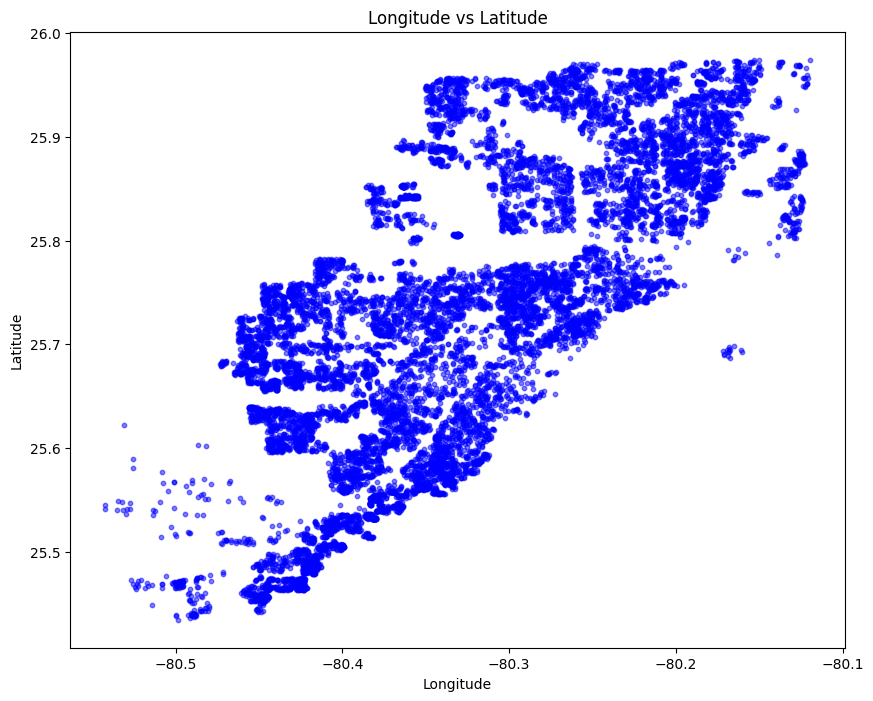

In [798]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it contains 'LATITUDE' and 'LONGITUDE' columns
plt.figure(figsize=(10, 8))
plt.scatter(df['LONGITUDE'], df['LATITUDE'], c='blue', alpha=0.5, s=10)  # Adjust size and color as needed
plt.title('Longitude vs Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


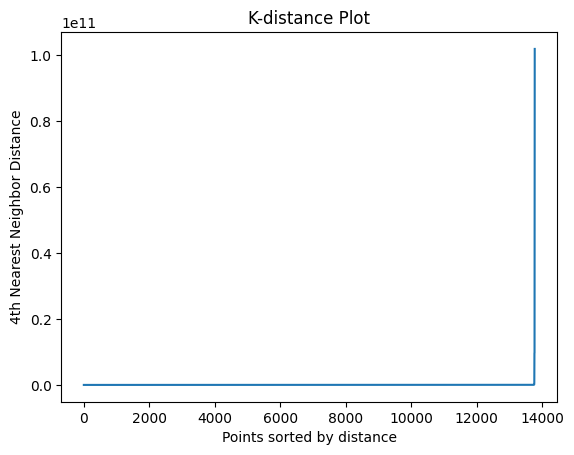

In [793]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Find the optimal eps using the k-distance plot
neighbors = NearestNeighbors(n_neighbors=5) 
neighbors_fit = neighbors.fit(df)
distances, indices = neighbors_fit.kneighbors(df)

# Sort distances and plot
distances = np.sort(distances[:, 4], axis=0)
plt.plot(distances)
plt.title('K-distance Plot')
plt.xlabel('Points sorted by distance')
plt.ylabel('4th Nearest Neighbor Distance')
plt.show()


       LATITUDE  LONGITUDE       PARCELNO  SALE_PRC  LND_SQFOOT  TOT_LVG_AREA  \
2476  25.774347 -80.206312   102000801020  400000.0    0.067221      0.113381   
2477  25.774395 -80.204183   102010001090  330000.0    0.067221      0.192711   
2040  25.843428 -80.201570   131120000340  150000.0    0.071700      0.012700   
2048  25.851104 -80.194277   131120080400  135000.0    0.038555      0.024664   
2046  25.850193 -80.194244   131120080620  125000.0    0.034757      0.040125   
...         ...        ...            ...       ...         ...           ...   
8870  25.560536 -80.353980  3660170161660  210000.0    0.077039      0.087061   
8861  25.560134 -80.352283  3660170162070  230000.0    0.044306      0.099577   
8862  25.560134 -80.352441  3660170162080  254500.0    0.034936      0.214430   
8865  25.560319 -80.352594  3660170162140  225000.0    0.059696      0.135652   
8873  25.560733 -80.351997  3660170162200  231500.0    0.038287      0.099577   

      RAIL_DIST  OCEAN_DIST

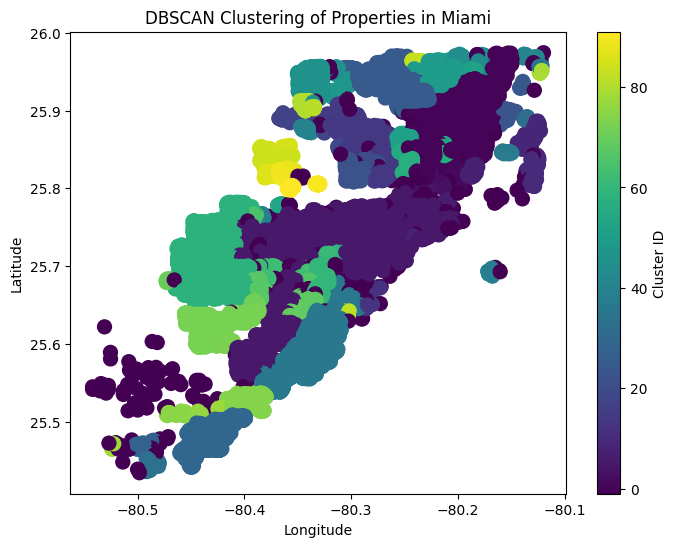

Number of points labeled as noise (-1): 335


In [794]:

# Normalize the data 

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['LATITUDE', 'LONGITUDE']])

# Apply DBSCAN
dbscan = DBSCAN(eps=0.035, min_samples=5)  # eps and min_samples are tunable parameters
df['cluster'] = dbscan.fit_predict(scaled_data)


print(df)


plt.figure(figsize=(8, 6))
plt.scatter(df['LONGITUDE'], df['LATITUDE'], c=df['cluster'], cmap='viridis', marker='o', s=100)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('DBSCAN Clustering of Properties in Miami')
plt.colorbar(label='Cluster ID')
plt.show()

# Count the number of points labeled as noise (-1)
noise_count = (df['cluster'] == -1).sum()
print(f"Number of points labeled as noise (-1): {noise_count}")



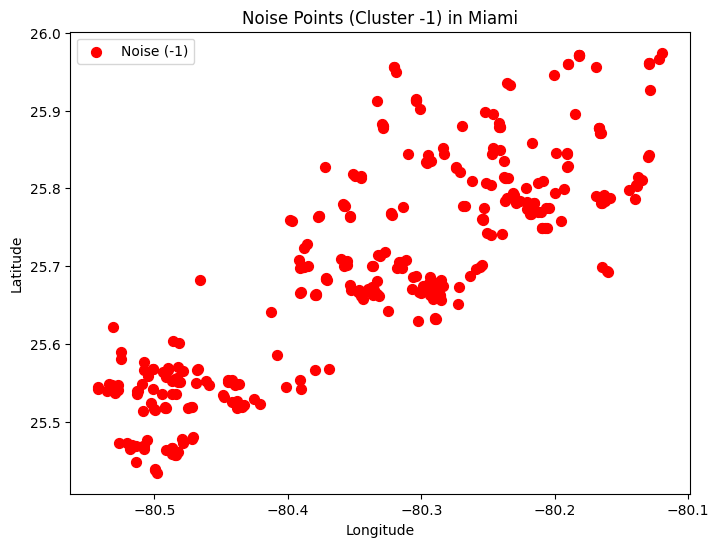

In [795]:
import matplotlib.pyplot as plt

# Assuming 'df' is your dataframe and 'cluster' column contains DBSCAN cluster labels

# Filter the points labeled as noise (-1)
noise_points = df[df['cluster'] == -1]

# Plot the noise points
plt.figure(figsize=(8, 6))
plt.scatter(noise_points['LONGITUDE'], noise_points['LATITUDE'], c='red', marker='o', s=50, label='Noise (-1)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Noise Points (Cluster -1) in Miami')
plt.legend()
plt.show()


Top 20 most popular clusters:
cluster
5     3332
0     1621
58    1587
36    1334
29     882
72     730
25     602
14     389
74     371
46     270
49     241
84     166
22     113
9      102
60      80
1       73
16      72
10      71
67      62
51      56
Name: count, dtype: int64


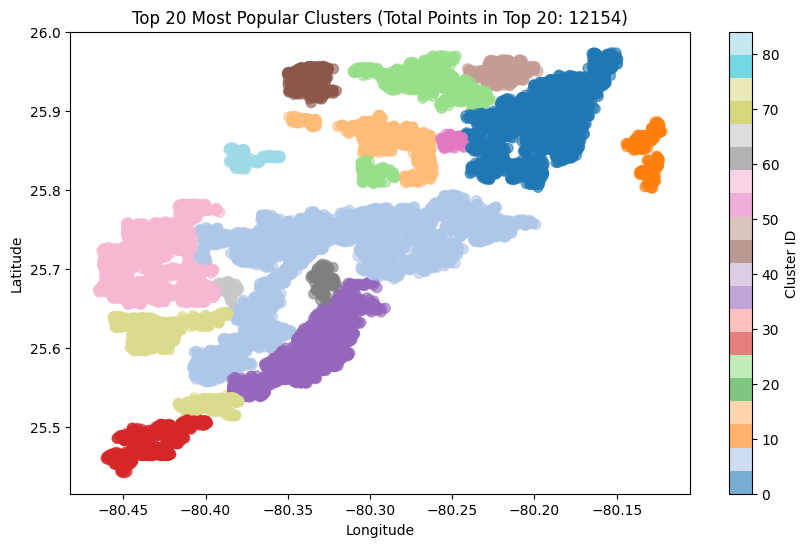

Total number of points in the top 20 clusters: 12154


In [796]:
import matplotlib.pyplot as plt

# Filter out the noise points (cluster = -1)
df_no_noise = df[df['cluster'] != -1]

# Count the number of points in each cluster
cluster_counts = df_no_noise['cluster'].value_counts()

top_20_clusters = cluster_counts.head(20)

print("Top 20 most popular clusters:")
print(top_20_clusters)

# Calculate the total number of points in the top 20 clusters
total_points_top_20 = top_20_clusters.sum()


plt.figure(figsize=(10, 6))

# Filter data for the top 20 clusters
top_20_data = df_no_noise[df_no_noise['cluster'].isin(top_20_clusters.index)]

# Plot the top 20 clusters
scatter = plt.scatter(top_20_data['LONGITUDE'], top_20_data['LATITUDE'], c=top_20_data['cluster'], cmap='tab20', s=50, alpha=0.6)


plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Top 20 Most Popular Clusters (Total Points in Top 20: {total_points_top_20})')


plt.colorbar(scatter, label='Cluster ID')

# Show the plot
plt.show()

# Print the total number of points in the top 20 clusters
print(f"Total number of points in the top 20 clusters: {total_points_top_20}")


In [797]:
# Drop the columns in place

# Remove rows where the cluster ID is -1 (noise points)
df_filtered = df[df['cluster'] != -1]

#add new feature avg price per region

average_price_per_cluster = df_filtered.groupby('cluster')['SALE_PRC'].mean().reset_index()
average_price_per_cluster.columns = ['cluster', 'avg_price_per_cluster']

df_filtered = df_filtered.merge(average_price_per_cluster, on='cluster', how='left')

df_filtered['avg_price_per_zone_log'] = np.log(df_filtered['avg_price_per_cluster'] + 1)

df_filtered['avg_price_per_zone_log'] = df_filtered['avg_price_per_zone_log'].round(3)


print(df_filtered.head())

# Check the shape of the filtered dataset
print(f"Filtered dataset shape: {df_filtered.shape}")

df_filtered.drop(columns=['PARCELNO', 'LATITUDE', 'LONGITUDE','cluster','avg_price_per_cluster','SALE_PRC'], inplace=True)

print(df_filtered.head())


df_filtered.to_csv('C:/Users/Mario/Desktop/MASTER TU WIEN/BI/preprocessed_dataset.csv', index=False)

    LATITUDE  LONGITUDE      PARCELNO  SALE_PRC  LND_SQFOOT  TOT_LVG_AREA  \
0  25.843428 -80.201570  131120000340  150000.0    0.071700      0.012700   
1  25.851104 -80.194277  131120080400  135000.0    0.038555      0.024664   
2  25.850193 -80.194244  131120080620  125000.0    0.034757      0.040125   
3  25.849094 -80.195215  131120120090  140000.0    0.055575      0.063133   
4  25.843546 -80.197072  131120680040  132900.0    0.056471      0.031842   

   RAIL_DIST  OCEAN_DIST  WATER_DIST  CNTR_DIST  ...  month_6  month_7  \
0   0.019891    0.356230    0.066409   0.131673  ...        1        0   
1   0.058097    0.324704    0.012702   0.148666  ...        0        0   
2   0.057350    0.324542    0.019244   0.146552  ...        0        0   
3   0.068505    0.328805    0.025943   0.144027  ...        0        0   
4   0.020030    0.336579    0.064074   0.131198  ...        0        1   

   month_8  month_9  month_10  month_11  month_12  cluster  \
0        0        0         0 